沒有用 SMOTE

In [98]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE
Ｘ,y=make_classification(n_samples=10000, n_features=2,n_redundant=0,n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1);

from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.769


單純只用 SMOTE

In [1]:

# decision tree evaluated on imbalanced dataset with SMOTE oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.833


也是 純粹 SMOTE 但跟使用 pipline 的結果不同

In [18]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
Ｘ,y=make_classification(n_samples=10000, n_features=2,n_redundant=0,n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1);
#smote
over = ADASYN(sampling_strategy=0.5)
X_smote,y_smote = over.fit_resample(X,y)

from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model,X_smote,y_smote, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.908


In [16]:
counter = Counter(y)
counter

Counter({0: 9900, 1: 100})

In [19]:
counter = Counter(y_smote)
counter

Counter({0: 9900, 1: 4937})

SMOTE + undersampling 有使用 pipeline

In [114]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define pipeline
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))
c = Counter(y)
print(c)

Mean ROC AUC: 0.840
Counter({0: 9900, 1: 100})


In [ ]:
SMOTE + undersampling 沒有使用 pipeline

In [113]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define pipeline
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
c = Counter(y)
print(c)
X,y = over.fit_resample(X,y)
c = Counter(y)
print(c)
X,y = under.fit_resample(X,y)
c = Counter(y)
print(c)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model,X,y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))


Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 990})
Counter({0: 1980, 1: 990})
Mean ROC AUC: 0.916


調整 SMOTE 的 k_neighbors=k

In [115]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
	# define pipeline
	model = DecisionTreeClassifier()
	over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))


> k=1, Mean ROC AUC: 0.826
> k=2, Mean ROC AUC: 0.831
> k=3, Mean ROC AUC: 0.836
> k=4, Mean ROC AUC: 0.842
> k=5, Mean ROC AUC: 0.840
> k=6, Mean ROC AUC: 0.841
> k=7, Mean ROC AUC: 0.853


In [12]:
import imblearn

In [14]:
# 參考 https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/  教學

from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE

In [41]:
# define dataset
Ｘ,y=make_classification(n_samples=10000, n_features=2,n_redundant=0,n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1);
# Ｘ是 input data, y 是該項 data 屬於什麼標籤類別  
# 用 make_classification 創造不平衡資料 兩個類別比例為 1:99 
# y 這邊用 0,1 各代表不同類別
# summarize class distribution
counter = Counter(y);
#print(counter);

# transform the dataset  套用 SMOTE 建立新 data
over = SMOTE()

X,y = over.fit_resample(X,y)
# summarize the new class distribution
over_counter = Counter(y) # 類別 1 原本的資料數 100，oversampling 後變為 9900
#print(over_counter)


9900
9900


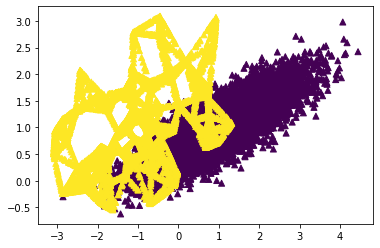

In [62]:

pyplot.scatter(X[:, 0], X[:, 1],marker='^',c=y);


No handles with labels found to put in legend.


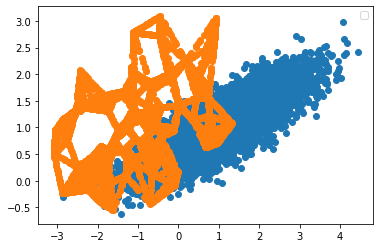

In [53]:

#scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

SMOTE 配適

In [79]:
Ｘ,y=make_classification(n_samples=10000, n_features=2,n_redundant=0,n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1);
counter = Counter(y)
counter

Counter({0: 9900, 1: 100})

In [88]:
over = SMOTE(sampling_strategy=0.1) # let 小類的數量是大類的 * 0.1 個
under = RandomUnderSampler(sampling_strategy=0.5)
X_res,y_res = over.fit_resample(X,y)
over_counter = Counter(y_res)
over_counter

Counter({0: 9900, 1: 990})

In [93]:
from imblearn.under_sampling import RandomUnderSampler
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_res, y_res = pipeline.fit_resample(X, y)
over_under_counter = Counter(y_res)

In [94]:
over_under_counter

Counter({0: 1980, 1: 990})

In [97]:

from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.766
